In [2]:
%pip install pyarrow fastparquet
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  


In [4]:
# import parquet file 
test_df = pd.read_parquet('test_video_games.parquet')
train_df = pd.read_parquet('train_video_games.parquet')

In [5]:
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  30000 non-null  object 
 1   user_id  30000 non-null  object 
 2   rating   30000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 703.3+ KB


# Check for Outliers!!

# Remove missing information  
user id and duplicates

In [6]:
# check for missing values
train_df.isnull().sum()

item_id    0
user_id    0
rating     0
dtype: int64

In [7]:
test_df.isnull().sum()

item_id    0
user_id    0
rating     0
dtype: int64

In [8]:
# check duplicates 
print("train df duplicates:", train_df.duplicated().sum())
print("test df duplicates:", test_df.duplicated().sum())

train df duplicates: 3420
test df duplicates: 855


In [9]:
# remove duplicates
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26580 entries, 0 to 29733
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  26580 non-null  object 
 1   user_id  26580 non-null  object 
 2   rating   26580 non-null  float64
dtypes: float64(1), object(2)
memory usage: 830.6+ KB


In [10]:
# number of rows in train and test
print("train length:", len(train_df))
print("test length:", len(test_df))

train length: 26580
test length: 6645


## Check that users in Test also appear in Train
remove user that are not in train split


In [11]:
# check if unique user_id in test also exist in train
# set can not have duplicates values!!
unique_test_user_ids = set(test_df['user_id']) - set(train_df['user_id'])
print("Unique user_ids in test but not in train:", len(unique_test_user_ids))

Unique user_ids in test but not in train: 0


In [12]:
# list all unique user_ids 
unique_user_ids_train = set(train_df['user_id'])
unique_user_ids_test = set(test_df['user_id'])
print("Unique user_ids in train:", len(unique_user_ids_train))
unique_user_ids = set(train_df['user_id']).union(set(test_df['user_id']))
# does the number of unique user_ids in train match the union of 
print("Unique user_ids in test:", len(unique_user_ids_test))
print("Unique user_ids in union:", len(unique_user_ids))
print("Do they match?", len(unique_user_ids_train) == len(unique_user_ids) and len(unique_user_ids_test) == len(unique_user_ids))

Unique user_ids in train: 1389
Unique user_ids in test: 1389
Unique user_ids in union: 1389
Do they match? True


## Item and User Rating Statistics

In [13]:
# stats about the rating
print(train_df.describe())
print(test_df.describe())

             rating
count  26580.000000
mean       4.228480
std        1.154615
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
            rating
count  6645.000000
mean      4.228292
std       1.150915
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000


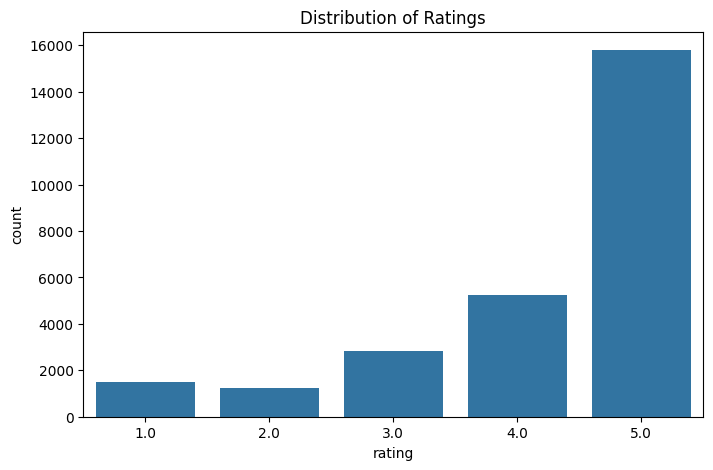

In [14]:
# distribution of ratings 
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=train_df)  
plt.title('Distribution of Ratings')
plt.show()

5 is the rating that makes up the highest percentage of ratings given.

In [15]:
unique_items_train= set(train_df['item_id'])
unique_item_test = set(test_df['item_id'])
print("Unique item_ids in train:", len(unique_items_train))
print(list(unique_items_train)[:20])
print("Unique item_ids in test:", len(unique_item_test))
print(list(unique_item_test)[:20])

Unique item_ids in train: 932
['B009GE3WUQ', 'B0030JTD7O', 'B00BGAA3S2', 'B0050SVH18', 'B00GN67PJ4', 'B0051D8QCA', 'B004LLHFAW', 'B005GISQ9S', 'B0088TN7NW', 'B07SRWRH5D', 'B06XX4D2KY', 'B01GY35E8Y', 'B00BN5T30E', 'B005YR308S', 'B00J48C36S', 'B002JTX72S', 'B001EYUW6S', 'B0009A4EV2', 'B01GY35UK6', 'B00Z9TJ1VQ']
Unique item_ids in test: 927
['B009GE3WUQ', 'B0030JTD7O', 'B00BGAA3S2', 'B0050SVH18', 'B00GN67PJ4', 'B0051D8QCA', 'B004LLHFAW', 'B005GISQ9S', 'B0088TN7NW', 'B06XX4D2KY', 'B01GY35E8Y', 'B07SRWRH5D', 'B00BN5T30E', 'B005YR308S', 'B002JTX72S', 'B00J48C36S', 'B001EYUW6S', 'B0009A4EV2', 'B00Z9TJ1VQ', 'B01GY35UK6']


Average Rating by item

In [16]:
# average rating by item_id
average_ratings_items = train_df.groupby('item_id')['rating'].mean().reset_index()
average_ratings_items.head(10) # head only outputs first 5 bro

,item_id,rating
0,B00000JRSB,4.750000
1,B00001X50M,4.437500
2,B00001XDUB,4.583333
3,B0000296O5,4.173913
4,B00004Y57G,4.521739
5,B00004YRQA,4.562500
6,B00004YUWA,4.846154
7,B00005BW7Q,4.636364
8,B00005ML10,4.466667
9,B00005NZ1G,4.777778


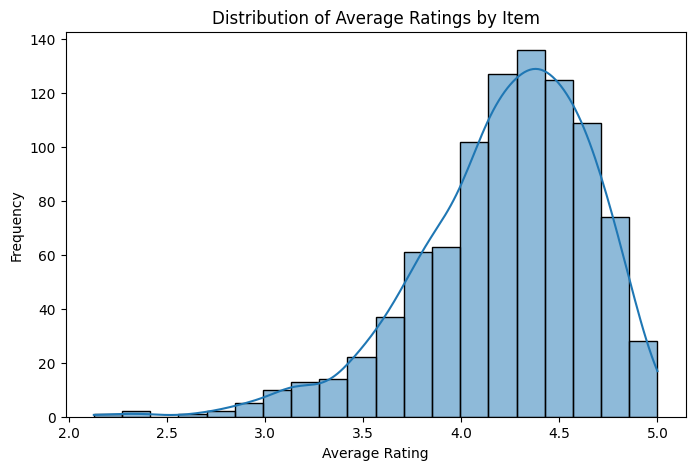

In [17]:
# distribution of average ratings
plt.figure(figsize=(8, 5))
sns.histplot(average_ratings_items['rating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings by Item')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

Not many **outliers** in the distribution of ratings

In [18]:
average_ratings_items.describe()

,rating
count,932.000000
mean,4.225078
std,0.434731
min,2.129032
25%,4.000000
50%,4.292892
75%,4.538462
max,5.000000


Average rating by user.

In [19]:
average_rating_user = train_df.groupby('user_id')['rating'].mean().reset_index()
average_rating_user.head(10)

,user_id,rating
0,AE25ZDXYBK3LHKCZ7XUODANPME4A,1.342105
1,AE2A5TMJ6YE6ZNWUAFTC6P5XAHXA,4.571429
2,AE2DHCNGTJRKHBHMYMCMKFDKVS2Q,4.888889
3,AE2ENMDBH5UMOK6CO3L4OKED2MHQ,3.517241
4,AE2FSBAB3Z5FBOWHKTNJHBZMRCKQ,4.937500
5,AE2G7VZZ3IWIQIJHRAPIGOGUJLPQ,4.083333
6,AE2HUSMYNRBL4B6ASF43Q6TPKP5A,3.714286
7,AE2IOCZVBSHG673Y26TFBL3AWZBQ,3.312500
8,AE2MC7R2JD4M3MK3W4HFPL2CLMYQ,5.000000
9,AE2MVXG6535JPWVNELHKUI3JB4SA,4.541667


Shows the average rating per user based on all the items a user has rated. 

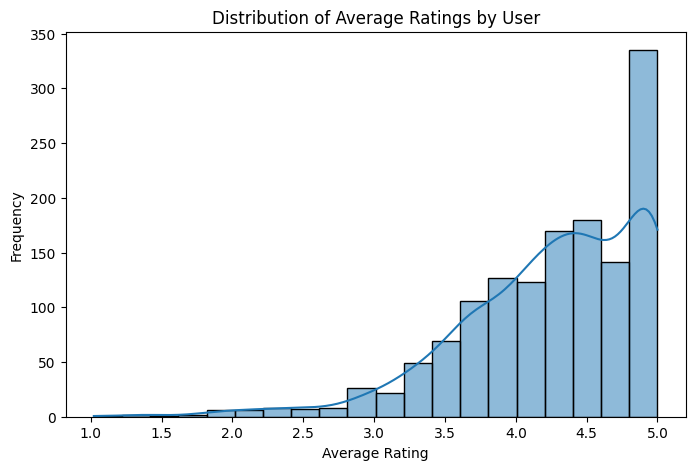

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(average_rating_user['rating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings by User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

Even by user there are not many outliers

In [21]:
average_rating_user.describe()

,rating
count,1389.000000
mean,4.251944
std,0.653510
min,1.021739
25%,3.863636
50%,4.360000
75%,4.785714
max,5.000000


what other analysis should I consider?  
- Outliers?
- Count of the ratings per item, this because one item could have a single 5 star rating making its average really high


### Check how many times an item was rated and how many times a user rated.

In [22]:
count_of_ratings_by_user = train_df.groupby('user_id')['rating'].count().reset_index()
count_of_ratings_by_user.columns = ['user_id', 'rating_count']  
count_of_ratings_by_user.head(10)

,user_id,rating_count
0,AE25ZDXYBK3LHKCZ7XUODANPME4A,38
1,AE2A5TMJ6YE6ZNWUAFTC6P5XAHXA,21
2,AE2DHCNGTJRKHBHMYMCMKFDKVS2Q,18
3,AE2ENMDBH5UMOK6CO3L4OKED2MHQ,29
4,AE2FSBAB3Z5FBOWHKTNJHBZMRCKQ,16
5,AE2G7VZZ3IWIQIJHRAPIGOGUJLPQ,12
6,AE2HUSMYNRBL4B6ASF43Q6TPKP5A,14
7,AE2IOCZVBSHG673Y26TFBL3AWZBQ,16
8,AE2MC7R2JD4M3MK3W4HFPL2CLMYQ,18
9,AE2MVXG6535JPWVNELHKUI3JB4SA,24


In [23]:
count_of_ratings_by_item = train_df.groupby('item_id')['rating'].count().reset_index()
count_of_ratings_by_item.columns = ['item_id', 'rating_count']
print(count_of_ratings_by_item.head(10))
count_of_ratings_by_item.describe()

      item_id  rating_count
0  B00000JRSB            32
1  B00001X50M            16
2  B00001XDUB            12
3  B0000296O5            23
4  B00004Y57G            23
5  B00004YRQA            16
6  B00004YUWA            13
7  B00005BW7Q            11
8  B00005ML10            15
9  B00005NZ1G            18


,rating_count
count,932.000000
mean,28.519313
std,21.089514
min,8.000000
25%,15.000000
50%,22.000000
75%,33.000000
max,167.000000


In [24]:
item = count_of_ratings_by_item[count_of_ratings_by_item['rating_count'] > 100]
print(item)

        item_id  rating_count
319  B004HD55VK           104
421  B007CM0K86           128
439  B0086VPUHI           167
455  B008CZN458           103
487  B00BGA9WK2           148
491  B00BHRD4BM           121
495  B00BN5T30E           161
503  B00C1TTF86           127
585  B00K0NV5J2           103
592  B00KIWEMIG           122
662  B00W9DHUBS           107
700  B014R4KYMS           109
865  B07YBWT3PK           121
873  B07YBXFDYN           164
875  B07YBXFF99           110


All the items have an average of 28 ratings.
One item had 167 ratings

## Compute Frequency of items that were highly rated


In [25]:
# compute frequency of items that were rated greater than or equal to 3
train_df['highly_rated'] = train_df['rating'] >= 3 # creates a new column in train_df
print(train_df.head())
item_highly_rated_freq = train_df.groupby('item_id')['highly_rated'].sum().reset_index()
item_highly_rated_freq['average_rating_by_item'] = average_ratings_items['rating']
item_highly_rated_freq.columns = ['item_id', 'highly_rated_count', 'average_rating_by_item']  
print(item_highly_rated_freq.info())
item_highly_rated_freq.head(10)


      item_id                       user_id  rating  highly_rated
0  B00ZM5OXD8  AHOGCWGRSFQ6YZH6QLYUMNQ4N3KA     5.0          True
1  B00O3JSRHW  AEKOQRDUY64SGH4PONBFTSIM2I2Q     4.0          True
2  B0056WJA30  AFA43JCV3C72LHM5BIVPV7UEJ2CA     5.0          True
3  B002I0J4NE  AFD3QCEDODUYBYMQGA6NWILJW7KA     5.0          True
4  B0031SWWPO  AGYF4ZSMTSZHCE3OH6CO5SJK5Y3A     5.0          True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   item_id                 932 non-null    object 
 1   highly_rated_count      932 non-null    int64  
 2   average_rating_by_item  932 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.0+ KB
None


,item_id,highly_rated_count,average_rating_by_item
0,B00000JRSB,31,4.750000
1,B00001X50M,14,4.437500
2,B00001XDUB,12,4.583333
3,B0000296O5,21,4.173913
4,B00004Y57G,23,4.521739
5,B00004YRQA,15,4.562500
6,B00004YUWA,13,4.846154
7,B00005BW7Q,11,4.636364
8,B00005ML10,15,4.466667
9,B00005NZ1G,18,4.777778


Every with length at 932, every item was highly rated (>= 3) at least once

In [26]:
# the directions in week 6 just wanted the count of when a video games rating is higher than 3 
# so average rating is just something I added

# sorted by highly rated count
item_highly_rated_freq_sorted = item_highly_rated_freq.sort_values(by='highly_rated_count', ascending=False)
print(item_highly_rated_freq_sorted.head(10))


        item_id  highly_rated_count  average_rating_by_item
439  B0086VPUHI                 154                4.425150
495  B00BN5T30E                 150                4.428571
873  B07YBXFDYN                 146                4.329268
487  B00BGA9WK2                 136                4.432432
421  B007CM0K86                 123                4.554688
592  B00KIWEMIG                 109                4.237705
865  B07YBWT3PK                 104                4.107438
875  B07YBXFF99                 103                4.345455
700  B014R4KYMS                 102                4.532110
319  B004HD55VK                 102                4.615385


In [27]:
# download the df as csv file
item_highly_rated_freq_sorted.to_csv('item_highly_rated_freq.csv', index=False)


Based on the frequency of the most rated items computed in Week 6,
implement the TopPop Recommender System, which always recommends
the same top-k items sorted decreasingly by the number of “high” ratings
(e.g., → 3) in the training split (train video games.parquet).

#### Create User-Item Matrix

In [28]:
# user item matrix
user_item_matrix = train_df.pivot_table(index='user_id', columns='item_id', values='rating')
print(user_item_matrix.info())
user_item_matrix.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, AE25ZDXYBK3LHKCZ7XUODANPME4A to AHZYXDJ3HNLKS2E73VOSNIZZJT4Q
Columns: 932 entries, B00000JRSB to B0C5K4M7WJ
dtypes: float64(932)
memory usage: 9.9+ MB
None


item_id
B00000JRSB    1357
B00001X50M    1373
B00001XDUB    1377
B0000296O5    1366
B00004Y57G    1366
              ... 
B0B4CRTWGM    1374
B0BDWVBWC9    1354
B0C3KYVDWT    1375
B0C5HQ6L7F    1370
B0C5K4M7WJ    1377
Length: 932, dtype: int64

In [29]:
user_item_matrix.to_csv('user_item_matrix.csv', index=True)

In [30]:
# number of not null cells in user item matrix should be equal to the number of rows in train df
print("Number of not null cells in user item matrix:", user_item_matrix.count().sum())
print("Number of rows in train df:", len(train_df))


Number of not null cells in user item matrix: 26580
Number of rows in train df: 26580


In [31]:
# convert train and test df to csv 
train_df.to_csv('csv_files/train_video_games.csv', index=False)
test_df.to_csv('csv_files/test_video_games.csv', index=False)